In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=11b15600c21ec8436253b1011f66057d


In [12]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lepaterique
Processing Record 2 of Set 1 | dosso
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | lagos
Processing Record 5 of Set 1 | shibetsu
Processing Record 6 of Set 1 | chokurdakh
Processing Record 7 of Set 1 | sitka
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | mercedes
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | sorland
Processing Record 14 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 15 of Set 1 | kushima
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 18 of Set 1 | saskylakh
Processing Record 19 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 20 of Set 1 | sao joao do piaui
Processing Record 21 of Set 1 | hilo
Proc

City not found. Skipping...
Processing Record 38 of Set 4 | udachnyy
Processing Record 39 of Set 4 | hobyo
Processing Record 40 of Set 4 | kadykchan
City not found. Skipping...
Processing Record 41 of Set 4 | bantry
Processing Record 42 of Set 4 | zarand
Processing Record 43 of Set 4 | hofn
Processing Record 44 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 45 of Set 4 | cidreira
Processing Record 46 of Set 4 | osypenko
Processing Record 47 of Set 4 | port keats
Processing Record 48 of Set 4 | aurillac
Processing Record 49 of Set 4 | miraflores
Processing Record 50 of Set 4 | katsuura
Processing Record 1 of Set 5 | shirvan
Processing Record 2 of Set 5 | airai
Processing Record 3 of Set 5 | henties bay
Processing Record 4 of Set 5 | hambantota
Processing Record 5 of Set 5 | xuddur
Processing Record 6 of Set 5 | saldanha
Processing Record 7 of Set 5 | mar del plata
Processing Record 8 of Set 5 | saleaula
City not found. Skipping...
Processing Record 9 of Set 5 | p

Processing Record 27 of Set 8 | aksarka
Processing Record 28 of Set 8 | raahe
Processing Record 29 of Set 8 | taquarana
Processing Record 30 of Set 8 | burnie
Processing Record 31 of Set 8 | paoua
Processing Record 32 of Set 8 | san jose
Processing Record 33 of Set 8 | sandviken
Processing Record 34 of Set 8 | ilebo
Processing Record 35 of Set 8 | bathsheba
Processing Record 36 of Set 8 | turukhansk
Processing Record 37 of Set 8 | san carlos de bariloche
Processing Record 38 of Set 8 | mananjary
Processing Record 39 of Set 8 | ondjiva
Processing Record 40 of Set 8 | ballina
Processing Record 41 of Set 8 | de-kastri
Processing Record 42 of Set 8 | santiago
Processing Record 43 of Set 8 | keti bandar
Processing Record 44 of Set 8 | north bend
Processing Record 45 of Set 8 | lorengau
Processing Record 46 of Set 8 | peto
Processing Record 47 of Set 8 | khandbari
Processing Record 48 of Set 8 | hay river
Processing Record 49 of Set 8 | santa cruz de la palma
Processing Record 50 of Set 8 | 

Processing Record 19 of Set 12 | taguatinga
Processing Record 20 of Set 12 | chiang mai
Processing Record 21 of Set 12 | fevralsk
City not found. Skipping...
Processing Record 22 of Set 12 | kenai
Processing Record 23 of Set 12 | bac lieu
Processing Record 24 of Set 12 | taunggyi
Processing Record 25 of Set 12 | lipari
Processing Record 26 of Set 12 | san juan
Processing Record 27 of Set 12 | barbar
City not found. Skipping...
Processing Record 28 of Set 12 | warqla
City not found. Skipping...
Processing Record 29 of Set 12 | barawe
City not found. Skipping...
Processing Record 30 of Set 12 | mooi river
City not found. Skipping...
Processing Record 31 of Set 12 | kidal
Processing Record 32 of Set 12 | borazjan
Processing Record 33 of Set 12 | guerrero negro
Processing Record 34 of Set 12 | lich
Processing Record 35 of Set 12 | ganzhou
Processing Record 36 of Set 12 | ostrovnoy
Processing Record 37 of Set 12 | mosquera
Processing Record 38 of Set 12 | oussouye
Processing Record 39 of Se

In [15]:
len(city_data)


564

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lepaterique,14.07,-87.47,84.20,42,40,9.17,HN,2020-05-07 23:39:45
1,Dosso,13.05,3.19,90.14,16,66,4.94,NE,2020-05-07 23:39:45
2,Bluff,-46.60,168.33,50.92,72,93,8.30,NZ,2020-05-07 23:39:45
3,Lagos,6.58,3.75,82.40,83,20,4.16,NG,2020-05-07 23:36:18
4,Shibetsu,43.66,145.13,53.17,51,0,4.03,JP,2020-05-07 23:39:45
5,Chokurdakh,70.63,147.92,27.21,97,76,8.63,RU,2020-05-07 23:39:45
6,Sitka,57.05,-135.33,57.20,46,40,10.29,US,2020-05-07 23:39:46
7,Ushuaia,-54.80,-68.30,48.20,70,90,17.22,AR,2020-05-07 23:39:12
8,Hermanus,-34.42,19.23,55.99,95,86,1.99,ZA,2020-05-07 23:39:46
9,Mercedes,-34.65,-59.43,55.00,86,33,5.66,AR,2020-05-07 23:37:32


In [18]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lepaterique,HN,2020-05-07 23:39:45,14.07,-87.47,84.20,42,40,9.17
1,Dosso,NE,2020-05-07 23:39:45,13.05,3.19,90.14,16,66,4.94
2,Bluff,NZ,2020-05-07 23:39:45,-46.60,168.33,50.92,72,93,8.30
3,Lagos,NG,2020-05-07 23:36:18,6.58,3.75,82.40,83,20,4.16
4,Shibetsu,JP,2020-05-07 23:39:45,43.66,145.13,53.17,51,0,4.03


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

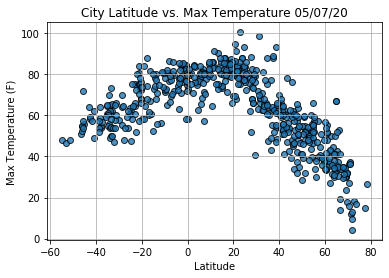

In [21]:
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

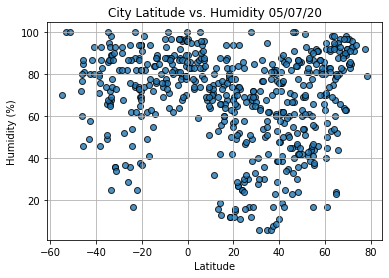

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

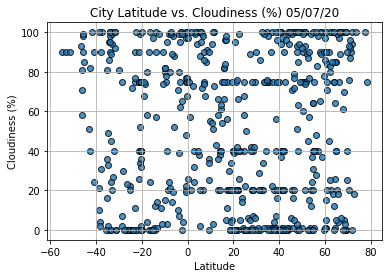

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

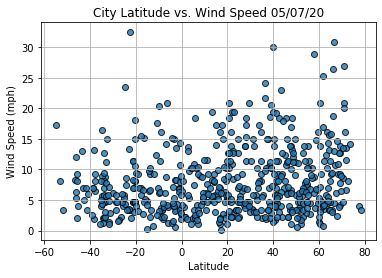

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()